# Projeto Unicórnios

Análise de startups de capital fechado com valor superior a U$ 1 bilhao.

In [1]:
#Importar as libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
tabela = pd.read_csv('Startups+in+2021+end.csv')
display(tabela)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...,...
931,931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"


In [13]:
#Primeiros registros das startups
tabela.head(10)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,5,Instacart,$39,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
6,6,Databricks,$38,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."
7,7,Revolut,$33,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital"
8,8,Nubank,$30,3/1/2018,Brazil,Sao Paulo,Fintech,"Sequoia Capital, Redpoint e.ventures, Kaszek V..."
9,9,Epic Games,$28.7,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"


In [14]:
#Verificar o tipo de informação
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [15]:
#Verifcar os campos nulos
tabela.isnull().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

In [16]:
#Verificando as startups que não possuem nome das cidades
tabela[tabela['City'].isnull()]
Sem_cidade = tabela[tabela['City'].isnull()]
display(Sem_cidade)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
11,11,FTX,$25,7/20/2021,Hong Kong,NaN,Fintech,"Sequoia Capital, Thoma Bravo, Softbank"
192,192,HyalRoute,$3.5,5/26/2020,Singapore,NaN,Mobile & telecommunications,Kuang-Chi
399,399,Advance Intelligence Group,$2,9/23/2021,Singapore,NaN,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund"
572,572,Trax,$1.3,7/22/2019,Singapore,NaN,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T..."
677,677,Amber Group,$1.1,6/21/2021,Hong Kong,NaN,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve..."
682,682,Carousell,$1.1,9/15/2021,Singapore,NaN,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent..."
735,735,WeLab,$1,11/8/2017,Hong Kong,NaN,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene..."
812,812,PatSnap,$1,3/16/2021,Singapore,NaN,Internet software & services,"Sequoia Capital China, Shunwei Capital Partner..."
840,840,Moglix,$1,5/17/2021,Singapore,NaN,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway"
843,843,Matrixport,$1,6/1/2021,Singapore,NaN,Fintech,"Dragonfly Captial, Qiming Venture Partners, DS..."


In [18]:
#Verifica quantos valores diferentes tem por coluna
tabela.nunique()

Unnamed: 0          936
Company             935
Valuation ($B)      192
Date Joined         589
Country              47
City                239
Industry             17
Select Investors    920
dtype: int64

Nesse caso acima, podemos ver que temos em nossa base de dados 935 startups diferentes

In [20]:
# Transformando a coluna Valuation
tabela['Valuation ($B)'] = pd.to_numeric( tabela['Valuation ($B)'].apply( lambda Linha: Linha.replace('$', '') ) )

tabela.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [21]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        936 non-null    int64  
 1   Company           936 non-null    object 
 2   Valuation ($B)    936 non-null    float64
 3   Date Joined       936 non-null    object 
 4   Country           936 non-null    object 
 5   City              921 non-null    object 
 6   Industry          936 non-null    object 
 7   Select Investors  935 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 58.6+ KB


Depois só chamar o comando tabela.info() para conferir se agora a coluna "Valuation ($B) passou de object para float

# Inicio das análises

In [22]:
#Quantidade de startup por setor 
tabela['Industry'].value_counts(normalize = True) # em porcentagens 

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Industry, dtype: float64

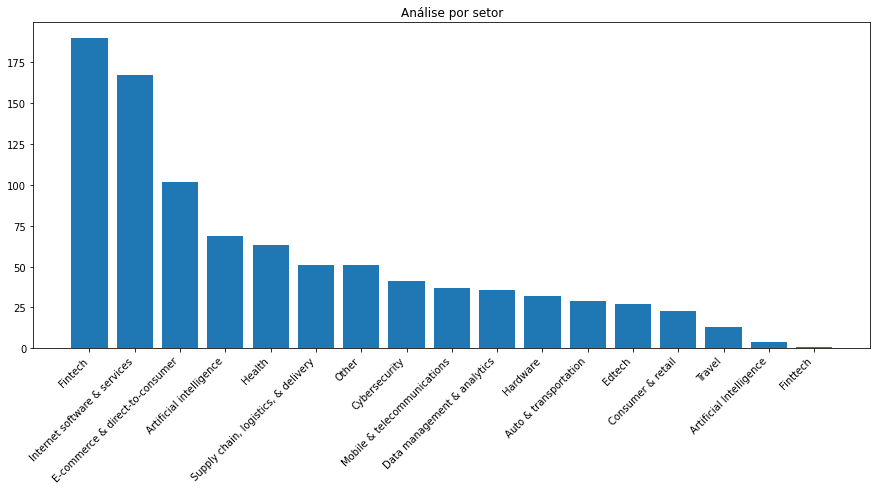

In [23]:
plt.figure(figsize =(15,6))
plt.title("Análise por setor")
plt.bar(tabela['Industry'].value_counts().index,tabela['Industry'].value_counts());
plt.xticks(rotation = 45, ha ='right'); #formata os nomes dos setores

Neste gráfico podemos ver a quantidade de startups por setor, onde 20% se encontra no setor Fintech, 17,8% no setor de Internet software and services e 10,8% no setor de e-commerce and direct-to-consumer.

In [24]:
#Analise de startup por país 
analise_país = tabela["Country"].value_counts(normalize = True)
analise_país

United States           0.509615
China                   0.180556
India                   0.054487
United Kingdom          0.039530
Germany                 0.024573
Israel                  0.022436
France                  0.020299
Canada                  0.016026
Brazil                  0.016026
South Korea             0.011752
Singapore               0.011752
Hong Kong               0.007479
Japan                   0.006410
Australia               0.006410
Mexico                  0.005342
Netherlands             0.005342
Indonesia               0.004274
Spain                   0.004274
Sweden                  0.004274
Switzerland             0.004274
Ireland                 0.003205
United Arab Emirates    0.003205
Norway                  0.003205
Belgium                 0.002137
Thailand                0.002137
Denmark                 0.002137
Philippines             0.002137
Finland                 0.002137
Colombia                0.002137
South Africa            0.002137
Turkey    

Com essa análise conseguimos identificar o ranking dos países com mais startups/Unicórnios

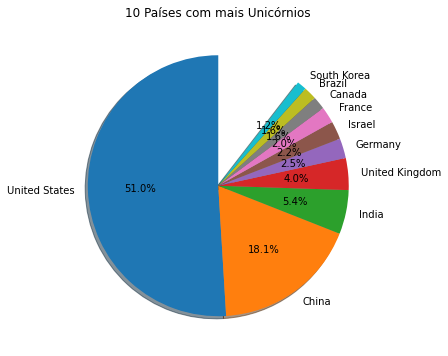

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize =(15,6))
plt.title("10 Países com mais Unicórnios")
plt.pie(analise_país.head(10), labels = analise_país.index[0:10],shadow = True, startangle=90, autopct='%1.1f%%')
plt.show()

O país com maior concentração de Startups/Unicórnios é os Estados Unidos, com 51% do número, seguido por China com 18%.

**Conversão de Datas**

In [27]:
tabela["Date Joined"] = pd.to_datetime(tabela["Date Joined"])
tabela["Date Joined"].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Date Joined, dtype: datetime64[ns]

In [28]:
tabela['Month'] = pd.DatetimeIndex( tabela['Date Joined'] ).month
tabela['Year'] = pd.DatetimeIndex( tabela['Date Joined'] ).year
tabela.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


**Análise Agrupada**

In [36]:
tabela_agrupada = tabela.groupby(by=['Company','Valuation ($B)','Country', 'Industry', 'Month','Year']).count().reset_index()
tabela_agrupada

,Company,Valuation ($B),Country,Industry,Month,Year,Unnamed: 0,Date Joined,City,Select Investors
0,1,2.15,Brazil,Fintech,9,2021,1,1,1,1
1,1047 Games,1.50,United States,Internet software & services,9,2021,1,1,1,1
2,1KMXC,1.00,China,Hardware,8,2021,1,1,1,1
3,1Password,2.00,Canada,Cybersecurity,7,2021,1,1,1,1
4,4Paradigm,2.00,China,Artificial intelligence,12,2018,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
931,iTutorGroup,1.00,China,Edtech,11,2015,1,1,1,1
932,o9 Solutions,1.00,United States,Artificial intelligence,4,2020,1,1,1,1
933,reddit,10.00,United States,Internet software & services,7,2017,1,1,1,1
934,solarisBank,1.65,Germany,Fintech,7,2021,1,1,1,1


Agrupando dessa forma, podemos adicionar um filtro para analisar por país

# Análise das Startups no Brasil

In [39]:
#Análise agrupada das startups no Brasil
tabela_brasil = tabela_agrupada.loc[tabela_agrupada['Country'] == 'Brazil']
tabela_brasil

,Company,Valuation ($B),Country,Industry,Month,Year,Unnamed: 0,Date Joined,City,Select Investors
0,1,2.15,Brazil,Fintech,9,2021,1,1,1,1
118,C6 Bank,5.05,Brazil,Fintech,12,2020,1,1,1,1
133,CargoX,1.00,Brazil,"Supply chain, logistics, & delivery",10,2021,1,1,1,1
196,Creditas,1.75,Brazil,Fintech,12,2020,1,1,1,1
244,EBANX,1.00,Brazil,Fintech,10,2019,1,1,1,1
467,Loft,2.90,Brazil,E-commerce & direct-to-consumer,1,2020,1,1,1,1
468,Loggi,2.00,Brazil,"Supply chain, logistics, & delivery",6,2019,1,1,1,1
482,MadeiraMadeira,1.00,Brazil,E-commerce & direct-to-consumer,1,2021,1,1,1,1
532,Movile,1.00,Brazil,Mobile & telecommunications,7,2018,1,1,1,1
560,Nubank,30.00,Brazil,Fintech,3,2018,1,1,1,1


In [43]:
brasil_valuation = tabela_brasil.sort_values(['Valuation ($B)'], ascending = False)
brasil_valuation

,Company,Valuation ($B),Country,Industry,Month,Year,Unnamed: 0,Date Joined,City,Select Investors
560,Nubank,30.00,Brazil,Fintech,3,2018,1,1,1,1
648,QuintoAndar,5.10,Brazil,E-commerce & direct-to-consumer,9,2019,1,1,1,1
118,C6 Bank,5.05,Brazil,Fintech,12,2020,1,1,1,1
563,Nuvemshop,3.10,Brazil,E-commerce & direct-to-consumer,8,2021,1,1,1,1
862,Wildlife Studios,3.00,Brazil,Other,12,2019,1,1,1,1
467,Loft,2.90,Brazil,E-commerce & direct-to-consumer,1,2020,1,1,1,1
0,1,2.15,Brazil,Fintech,9,2021,1,1,1,1
468,Loggi,2.00,Brazil,"Supply chain, logistics, & delivery",6,2019,1,1,1,1
196,Creditas,1.75,Brazil,Fintech,12,2020,1,1,1,1
133,CargoX,1.00,Brazil,"Supply chain, logistics, & delivery",10,2021,1,1,1,1


Temos agora as Startups/Unicórnios do Brasil, em ordem decrescente de capital

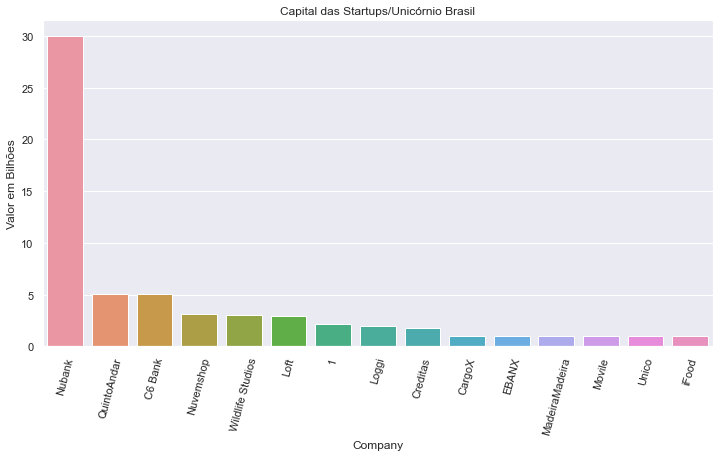

In [46]:
sns.set()
plt.figure(figsize=(12,6))
grafico = sns.barplot(data=brasil_valuation, x="Company", y="Valuation ($B)")
grafico.set_xticklabels(grafico.get_xticklabels(), rotation = 75) #colocar os nomes dos bairros rotacionados
grafico.set_title("Capital das Startups/Unicórnio Brasil")
plt.ylabel("Valor em Bilhões")


plt.show()

Nubank segue como a startup com maior valor de capital entre as startups no Brasil, com cerca de 30 Bilhões de dólares em capital.

# Análise mundial

In [50]:
#Análise por país
Analise_pais = tabela.groupby(['Country']).sum()['Valuation ($B)'].reset_index()
Analise_pais

,Country,Valuation ($B)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60
5,Brazil,61.05
6,Canada,37.73
7,Chile,1.50
8,China,569.48
9,Colombia,6.40


**Top 5 países com maior valor de capitais vindo das Startups/Unicórnios**

In [57]:
analise_country = Analise_pais.sort_values(["Valuation ($B)"], ascending = False)
analise_country.head()

,Country,Valuation ($B)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


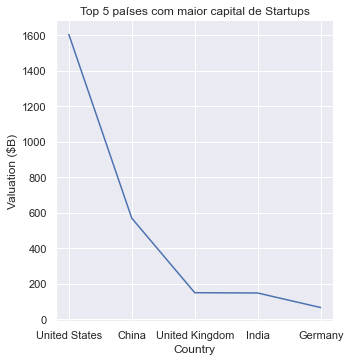

In [70]:
sns.relplot(x = "Country", y= 'Valuation ($B)', data = analise_country.head(5), kind ='line');
plt.title("Top 5 países com maior capital de Startups");

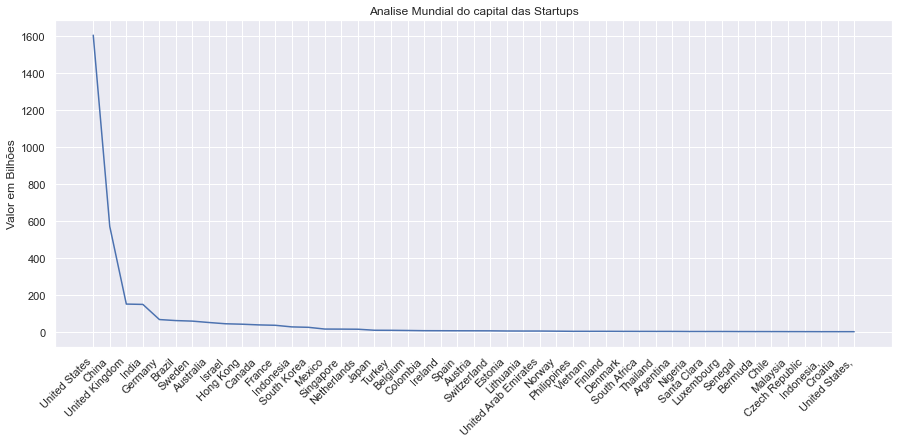

In [71]:
plt.figure( figsize=(15,6) )
plt.plot( analise_country['Country'], analise_country['Valuation ($B)'] )
plt.title('Analise Mundial do capital das Startups')
plt.ylabel("Valor em Bilhões")
plt.xticks( rotation=45, ha='right');